In [1]:
# Determine if a patient has diabetes based on the diagnosis or not, using Navie Bayes

In [152]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [153]:
data_set = pd.read_csv("diabetes.csv")
data_set.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [154]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [155]:
data_set.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [129]:
#In the data there may be some null values but also
#Here some values are "0" under glucose, BP, insulin, skin thickness, BMI
#but pratically not possible so lets make them None or NaN values

In [130]:
data_set[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_set[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
#Changes every '0' in given to NaN

In [131]:
data_set.isnull().sum()
#are the number of nulls in each column

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     372
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [132]:
#Filling the NaN values with most appropriate values 1. using interpolation
#2. Mean, Median also

In [133]:
data_set['Glucose'].fillna(data_set['Glucose'].mean(), inplace = True)
data_set['BMI'].fillna(data_set['BMI'].median(), inplace = True)
data_set['BloodPressure'].fillna(data_set['BloodPressure'].median(), inplace = True)

C:\Users\Tony\AppData\Local\Temp\ipykernel_16808\1061547719.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_set['Glucose'].fillna(data_set['Glucose'].mean(), inplace = True)
C:\Users\Tony\AppData\Local\Temp\ipykernel_16808\1061547719.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [134]:
data_set.interpolate(inplace=True)

In [135]:
data_set.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               1
Insulin                     1
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [138]:
#Remaining got filled with mean values
data_set['Insulin'].fillna(data_set['Insulin'].mean(), inplace=True)
data_set['SkinThickness'].fillna(data_set['SkinThickness'].mean(), inplace=True)

C:\Users\Tony\AppData\Local\Temp\ipykernel_16808\298655228.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_set['Insulin'].fillna(data_set['Insulin'].mean(), inplace=True)
C:\Users\Tony\AppData\Local\Temp\ipykernel_16808\298655228.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [139]:
data_set.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [140]:
#Using matplotlib we will plot charts

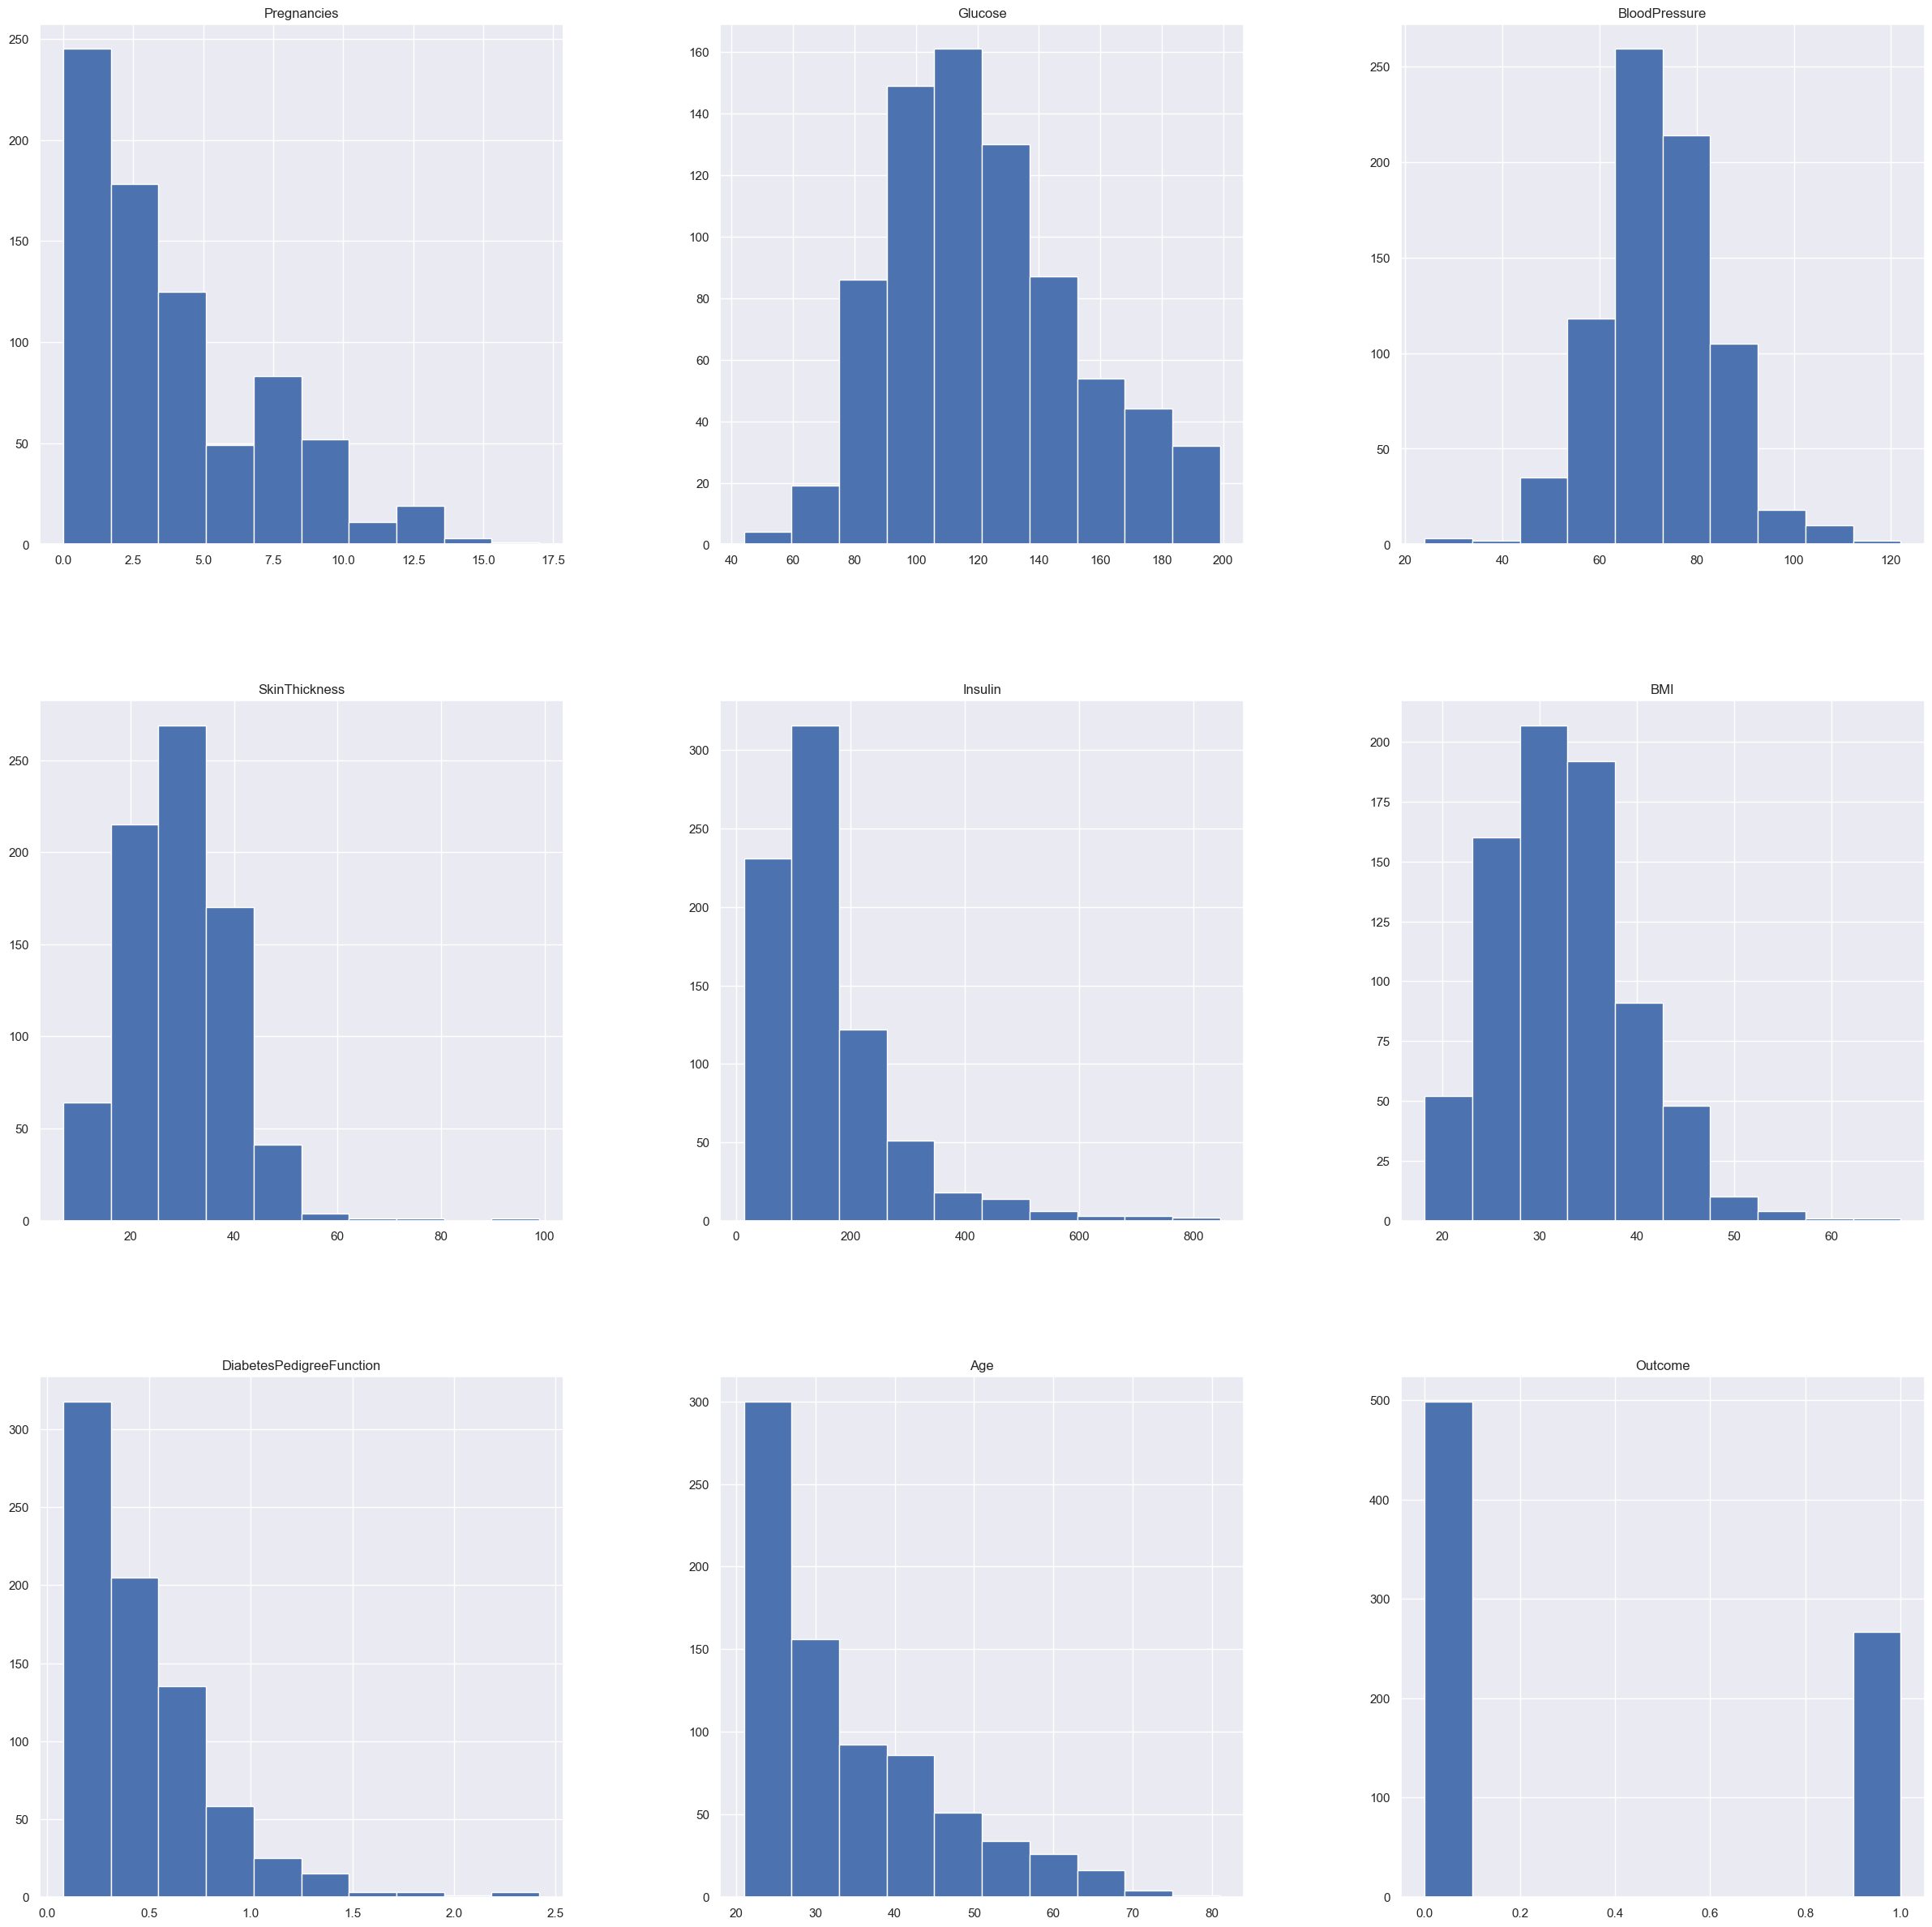

In [141]:
plot_df = data_set.hist(figsize=(30,30))

In [163]:
data_set_final=data_set.drop('Outcome', axis=1)
data_outcome = data_set[['Outcome']]

In [164]:
data_outcome.info()
data_set_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 766 entries, 2 to 767
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Outcome  766 non-null    int64
dtypes: int64(1)
memory usage: 28.1 KB
<class 'pandas.core.frame.DataFrame'>
Index: 766 entries, 2 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               766 non-null    int64  
 1   Glucose                   766 non-null    int64  
 2   BloodPressure             766 non-null    int64  
 3   SkinThickness             766 non-null    int64  
 4   Insulin                   766 non-null    int64  
 5   BMI                       766 non-null    float64
 6   DiabetesPedigreeFunction  766 non-null    float64
 7   Age                       766 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 70.0 KB


In [80]:
#we will seperate these data_set into training and testing model(80 training and 20 testing)
#After splitting we will train in NAVIE BAYES model and predict accuracy of the model 

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [182]:
#1st training data then outcome
train_data_set, test_data_set, train_data_outcome, test_data_outcome, = train_test_split(data_set_final,data_outcome, test_size=0.3)

In [183]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(train_data_set,train_data_outcome)

prediction=model.predict(test_data_set)

C:\Users\Tony\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [184]:
#Evaluation of model and Accuracy finding

print("Accuracy: ", accuracy_score(test_data_outcome, prediction))
print(classification_report(test_data_outcome,prediction))

Accuracy:  0.782608695652174
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       144
           1       0.74      0.64      0.69        86

    accuracy                           0.78       230
   macro avg       0.77      0.75      0.76       230
weighted avg       0.78      0.78      0.78       230

